In [6]:
import numpy as np
X=np.load('X_small_train62.npy').astype(np.float32)
X.shape

(1300, 100, 100, 3)

In [2]:
Y_x=np.load('Y_small_train62.npy')

In [13]:
YY=np.zeros((X.shape[0],6))
Y_0=np.where(Y_x==0)[0]
Y_1=np.where(Y_x==1)[0]
Y_2=np.where(Y_x==2)[0]
Y_3=np.where(Y_x==3)[0]
Y_4=np.where(Y_x==4)[0]
Y_5=np.where(Y_x==5)[0]
YY[Y_0,0]=1
YY[Y_1,1]=1
YY[Y_2,2]=1
YY[Y_3,3]=1
YY[Y_4,4]=1
YY[Y_5,5]=1

In [14]:
YY[0]

array([0., 0., 0., 1., 0., 0.])

In [3]:
for i in range(10):
    print(Y_x[Y_x==i].shape)

(196,)
(345,)
(216,)
(257,)
(198,)
(82,)
(6,)
(0,)
(0,)
(0,)


In [4]:
import matplotlib.pyplot as plt

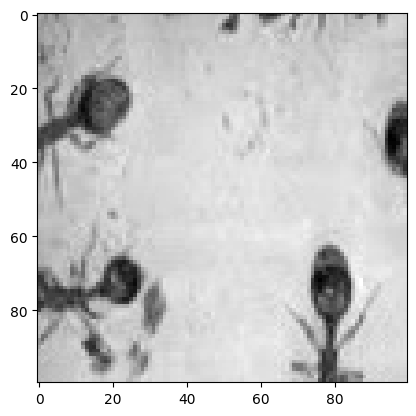

In [7]:
XX=np.zeros((X.shape[0], 3, 100, 100)).astype(np.float32)
for i in range(X.shape[0]):
    temp =np.zeros((3,100,100))
    temp[0]=X[i, :, :, 0]
    temp[1]=X[i, :, :, 1]
    temp[2]=X[i, :, :, 2]
    XX[i]=temp
plt.imshow(XX[0,0],cmap='gray')

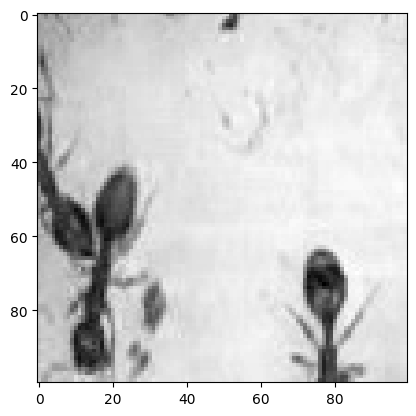

In [8]:
plt.imshow(XX[100,0],cmap='gray')

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

net = nn.Sequential(
    nn.Conv2d(3, 20, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(20, 40, kernel_size=7), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=4, stride=4),
    nn.Conv2d(40, 80, kernel_size=11), nn.Sigmoid(),
    #nn.AvgPool2d(kernel_size=8, stride=8),
    nn.Flatten(),
    nn.Linear(80, 40), 
    nn.Linear(40, 20), 
    nn.Linear(20, 6), nn.Softmax(dim=1)
    )

# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 20, kernel_size=5, padding=2)
#         self.pool1 = nn.MaxPool2d(kernel_size=5, stride=5)
#         self.conv2 = nn.Conv2d(20, 40, kernel_size=7)
#         self.pool2 = nn.MaxPool2d(kernel_size=7, stride=7)
#         self.conv3 = nn.Conv2d(40, 80, kernel_size=11)
#         self.pool3 = nn.MaxPool2d(kernel_size=11, stride=11)
#         self.fc1 = nn.Linear(160, 80)
#         self.fc2 = nn.Linear(80, 1)

#     def forward(self, x):
#         x = self.pool1(F.relu(self.conv1(x)))
#         x = self.pool2(F.relu(self.conv2(x)))
#         x = self.pool3(F.relu(self.conv3(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x


# net = Net()

In [10]:
net

Sequential(
  (0): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(20, 40, kernel_size=(7, 7), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=4, stride=4, padding=0)
  (6): Conv2d(40, 80, kernel_size=(11, 11), stride=(1, 1))
  (7): Sigmoid()
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=80, out_features=40, bias=True)
  (10): Linear(in_features=40, out_features=20, bias=True)
  (11): Linear(in_features=20, out_features=6, bias=True)
  (12): Softmax(dim=1)
)

In [11]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
 
 
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    print(mu,sigma)
    return (data - mu) / sigma

In [15]:
XX_temp = torch.from_numpy(XX)
for layer in net:
    XX_temp = layer(XX_temp)
    print(layer.__class__.__name__,'output shape: \t',XX_temp.shape)

Conv2d output shape: 	 torch.Size([1300, 20, 100, 100])
Sigmoid output shape: 	 torch.Size([1300, 20, 100, 100])
AvgPool2d output shape: 	 torch.Size([1300, 20, 50, 50])
Conv2d output shape: 	 torch.Size([1300, 40, 44, 44])
Sigmoid output shape: 	 torch.Size([1300, 40, 44, 44])
AvgPool2d output shape: 	 torch.Size([1300, 40, 11, 11])
Conv2d output shape: 	 torch.Size([1300, 80, 1, 1])
Sigmoid output shape: 	 torch.Size([1300, 80, 1, 1])
Flatten output shape: 	 torch.Size([1300, 80])
Linear output shape: 	 torch.Size([1300, 40])
Linear output shape: 	 torch.Size([1300, 20])
Linear output shape: 	 torch.Size([1300, 6])
Softmax output shape: 	 torch.Size([1300, 6])


In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
XX=torch.from_numpy(XX)

In [18]:
choices=np.random.choice(1300,1300)
YY=torch.from_numpy(YY)
XX_train=XX[choices]
YY_train=YY[choices]

In [ ]:
for epoch in range(200):  # loop over the dataset multiple times

    running_loss = 0.0
    for i in range(0,1300,64):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = XX_train[i:i+64], YY_train[i:i+64]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #if i % 2000 == 1999:    # print every 2000 mini-batches
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
    #running_loss = 0.0

print('Finished Training')

In [33]:
outputs.shape

torch.Size([196, 3])

In [42]:
labels

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0

In [43]:
outputs

tensor([[0.2629, 0.4039, 0.3333],
        [0.2628, 0.4039, 0.3334],
        [0.2628, 0.4039, 0.3333],
        [0.2628, 0.4038, 0.3334],
        [0.2628, 0.4039, 0.3334],
        [0.2627, 0.4039, 0.3334],
        [0.2628, 0.4039, 0.3333],
        [0.2628, 0.4037, 0.3335],
        [0.2629, 0.4038, 0.3333],
        [0.2628, 0.4038, 0.3334],
        [0.2629, 0.4038, 0.3333],
        [0.2628, 0.4038, 0.3334],
        [0.2629, 0.4038, 0.3333],
        [0.2628, 0.4038, 0.3334],
        [0.2628, 0.4039, 0.3333],
        [0.2628, 0.4039, 0.3333],
        [0.2629, 0.4038, 0.3334],
        [0.2628, 0.4038, 0.3334],
        [0.2627, 0.4040, 0.3333],
        [0.2628, 0.4039, 0.3333],
        [0.2628, 0.4038, 0.3335],
        [0.2628, 0.4039, 0.3333],
        [0.2628, 0.4038, 0.3334],
        [0.2627, 0.4038, 0.3335],
        [0.2628, 0.4039, 0.3332],
        [0.2628, 0.4039, 0.3333],
        [0.2628, 0.4038, 0.3334],
        [0.2630, 0.4037, 0.3333],
        [0.2628, 0.4038, 0.3334],
        [0.262

In [44]:
outputs = net(XX)
outputs

tensor([[0.2628, 0.4038, 0.3334],
        [0.2628, 0.4038, 0.3334],
        [0.2628, 0.4038, 0.3334],
        ...,
        [0.2628, 0.4039, 0.3333],
        [0.2628, 0.4039, 0.3333],
        [0.2629, 0.4039, 0.3333]], grad_fn=<SoftmaxBackward0>)

In [36]:
pred1=torch.argmax(outputs, dim=1)
pred1

tensor([2, 2, 2,  ..., 2, 2, 2])

In [39]:
len(pred1[pred1==2])

1960

In [33]:
Y_pred=outputs.detach().numpy()
Yp=np.argmax(Y_pred,axis=1)

In [39]:
Yp=np.argmax(Y_pred,axis=1)
Yp

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
Yp.shape

(1960,)

In [34]:
for i in range(10):
    print(len(Yp[Yp==i]))

0
0
0
0
0
0
0
0
0
0
